# loc4tor

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import pickle
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' #for Google Colab

from tensorflow.keras import datasets, layers, models
from tensorflow.keras import losses 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Read Dataset

In [0]:
train_images = pickle.load(open("x.pickle","rb")) 
train_labels = pickle.load(open("y.pickle","rb")) 

train_images = train_images/255.0

train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2)

### Verify the data

1


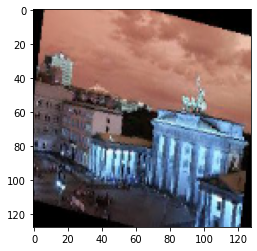

In [0]:
plt.imshow(train_images[2])
print(train_labels[2])
#plt.show()

### Create the convolutional base

In [0]:
IMG_SIZE = 128

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape= (IMG_SIZE, IMG_SIZE, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        3

### Compile and train the model

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=15, validation_split=0.1)

Epoch 1/15
901/901 [==============================] - 177s 196ms/step - loss: 1.7934 - accuracy: 0.3271 - val_loss: 1.5434 - val_accuracy: 0.4494
Epoch 2/15
901/901 [==============================] - 182s 202ms/step - loss: 1.2903 - accuracy: 0.5354 - val_loss: 1.1728 - val_accuracy: 0.5896
Epoch 3/15
901/901 [==============================] - 182s 202ms/step - loss: 0.9654 - accuracy: 0.6658 - val_loss: 1.0523 - val_accuracy: 0.6365
Epoch 4/15
901/901 [==============================] - 182s 202ms/step - loss: 0.7513 - accuracy: 0.7434 - val_loss: 0.8853 - val_accuracy: 0.7033
Epoch 5/15
901/901 [==============================] - 182s 202ms/step - loss: 0.6058 - accuracy: 0.7945 - val_loss: 0.6573 - val_accuracy: 0.7879
Epoch 6/15
901/901 [==============================] - 182s 202ms/step - loss: 0.4868 - accuracy: 0.8369 - val_loss: 0.6899 - val_accuracy: 0.7755
Epoch 7/15
901/901 [==============================] - 184s 204ms/step - loss: 0.4078 - accuracy: 0.8618 - val_loss: 0.5529 -

### Evaluate the model

251/251 - 8s - loss: 0.5715 - accuracy: 0.8551


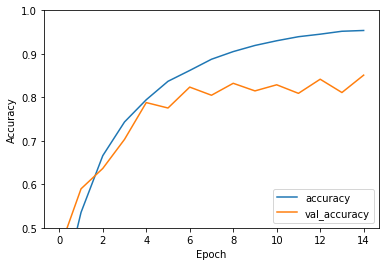

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [0]:
print(test_acc)

0.8550724387168884


### Save the model

In [0]:
MODEL_DIR = "models/loc4tor/1"
export_path = os.path.join(MODEL_DIR)
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

export_path = models/loc4tor/1

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: models/loc4tor/1/assets


#### Convert model to JSON 

$ tensorflowjs_converter --input_format=tf_saved_model /Users/luca/loc4tor/PythonScripts/models/loc4tor/1 /Users/luca/loc4tor/Frontend/js/model

